# Péndulo doble

In [1]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
import sympy as sym

In [2]:
np.random.uniform(0.01,np.pi)

2.3183236657285473

In [3]:
# Inicializar las características del sistema
g = 9.8       # Gravedad de la Tierra
l1 = 0.5     # Longitud del primer péndulo
l2 = 0.3      # Longitud del segundo péndulo
m1 = 0.8      # Masa del primer péndulo en kg
m2 = 0.4      # Masa del segundo péndulo en kg

In [4]:
def PenduloDoble(t, arreglo):
    theta1 = arreglo[0]
    theta2 = arreglo[1]
    v1 = arreglo[2]
    v2 = arreglo[3]
    p1=(-g*(2*m1+m2)*np.sin(theta1)-m2*g*np.sin(theta1-2*theta2)-2*np.sin(theta1-theta2)*m2*(v2**2*l2+v1*l1*np.cos(theta1-theta2)))/(l1*(2*m1+m2-m2*np.cos(2*theta1-2*theta2)))
    p2=(2*np.sin(theta1-theta2)*(v1**2*l1*(m1+m2)+g*(m1+m2)*np.cos(theta1)+v2**2*l2*m2*np.cos(theta1-theta2)))/(l2*(2*m1+m2-m2*np.cos(2*theta1-2*theta2)))

    #p1 = ((-g*((2*m1) + m2)*np.sin(theta1)) - (m2*g*np.sin(theta1 - (2*theta2))) - (2*np.sin(theta1 - theta2)*m2*(((v2**2)*l2) + ((v1**2)*l1*np.cos(theta1 - theta2))))) / (l1*((2*m1) + m2 - (m2*np.cos((2*theta1) - (2*theta2)))))
    #p2 = (((2*np.sin(theta1 - theta2))*((v1**2)*l1*(m1 + m2))) + (g*(m1 + m2)*np.cos(theta1)) + ((v2**2)*l2*m2*np.cos(theta1-theta2))) / (l2*((2*m1) + m2 - (m2*np.cos((2*theta1) - (2*theta2)))))
    return np.array([v1,v2,p1,p2])

In [5]:
solve_ivp?

In [5]:
t = (0,20)
arreglo_1 = []
theta1_1 = np.random.uniform(0.01,np.pi)
theta2_1 = theta1_1 + 0.2
v1_1 = np.random.uniform(0,2)
v2_1 = v1_1 + 0.1
arreglo_1.append(theta1_1)
arreglo_1.append(theta2_1)
arreglo_1.append(v1_1)
arreglo_1.append(v2_1)
arreglo_1

[1.1609999730175566,
 1.3609999730175566,
 1.3818761254275336,
 1.4818761254275337]

In [6]:
arreglo_2 = []
theta1_2 = theta1_1 + 0.2
theta2_2 = theta1_2 + 0.2
v1_2 = v1_1 + 0.1
v2_2 = v1_2 + 0.1
arreglo_2.append(theta1_2)
arreglo_2.append(theta2_2)
arreglo_2.append(v1_2)
arreglo_2.append(v2_2)
arreglo_2

[1.3609999730175566,
 1.5609999730175566,
 1.4818761254275337,
 1.5818761254275338]

In [7]:
solucion_1 = solve_ivp(PenduloDoble, t, np.array(arreglo_1), max_step = 0.0001)
solucion_1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1200008
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000e+00, 1.00000e-04, 2.00000e-04, ..., 1.99999e+01,
       2.00000e+01, 2.00000e+01])
 t_events: None
        y: array([[ 1.16099997,  1.16113808,  1.16127601, ..., -0.67703372,
        -0.67743655, -0.67743655],
       [ 1.36099997,  1.36114814,  1.36129625, ..., -2.30930313,
        -2.3098637 , -2.3098637 ],
       [ 1.38187613,  1.38017892,  1.37848155, ..., -4.02862067,
        -4.02799748, -4.02799748],
       [ 1.48187613,  1.48138197,  1.48088816, ..., -5.60824265,
        -5.60306008, -5.60306007]])
 y_events: None

In [8]:
solucion_2 = solve_ivp(PenduloDoble, t, np.array(arreglo_2), max_step = 0.0001)
solucion_2

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1200008
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000e+00, 1.00000e-04, 2.00000e-04, ..., 1.99999e+01,
       2.00000e+01, 2.00000e+01])
 t_events: None
        y: array([[ 1.36099997,  1.36114807,  1.36129598, ...,  0.54985   ,
         0.54939471,  0.54939471],
       [ 1.56099997,  1.56115814,  1.56131628, ...,  1.66764838,
         1.66687973,  1.66687973],
       [ 1.48187613,  1.48002679,  1.47817735, ..., -4.55304596,
        -4.55276449, -4.55276449],
       [ 1.58187613,  1.58154666,  1.5812176 , ..., -7.68302106,
        -7.68984261, -7.68984262]])
 y_events: None

In [9]:
solucion_1.y.shape

(4, 200002)

In [10]:
solucion_2.y.shape

(4, 200002)

In [11]:
# Redimensionamiento de la solución del primer péndulo doble
x_1 = solucion_1.y.T
x_1.shape

(200002, 4)

In [12]:
# Redimensionamiento de la solución del segundo péndulo doble
x_2 = solucion_2.y.T
x_2.shape

(200002, 4)

In [13]:
x_1[:,0] # Posición del Péndulo 1

array([ 1.16099997,  1.16113808,  1.16127601, ..., -0.67703372,
       -0.67743655, -0.67743655])

In [14]:
x_2[:,0]

array([1.36099997, 1.36114807, 1.36129598, ..., 0.54985   , 0.54939471,
       0.54939471])

In [15]:
x_1[:,1] # Posición del Péndulo 2

array([ 1.36099997,  1.36114814,  1.36129625, ..., -2.30930313,
       -2.3098637 , -2.3098637 ])

In [16]:
x_1[:,2] # Velocidad del Péndulo 1

array([ 1.38187613,  1.38017892,  1.37848155, ..., -4.02862067,
       -4.02799748, -4.02799748])

In [17]:
x_1[:,3] # Velocidad del Péndulo 2

array([ 1.48187613,  1.48138197,  1.48088816, ..., -5.60824265,
       -5.60306008, -5.60306007])

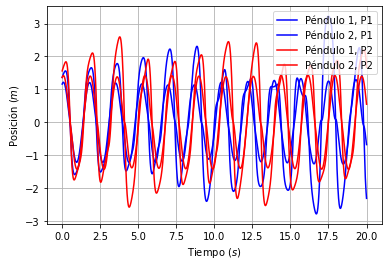

In [18]:
plt.plot(solucion_1.t,x_1[:,0], 'b', label = 'Péndulo 1, P1') 
plt.plot(solucion_1.t,x_1[:,1], 'b', label = 'Péndulo 2, P1')
plt.plot(solucion_2.t,x_2[:,0], 'r', label = 'Péndulo 1, P2') 
plt.plot(solucion_2.t,x_2[:,1], 'r', label = 'Péndulo 2, P2')
plt.xlabel('Tiempo ($s$)')
plt.ylabel('Posición ($m$)')
plt.legend()
plt.grid()

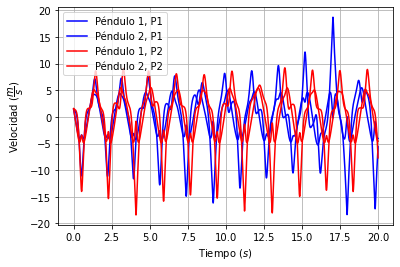

In [19]:
plt.plot(solucion_1.t,x_1[:,2], 'b', label = 'Péndulo 1, P1')
plt.plot(solucion_1.t,x_1[:,3], 'b',  label = 'Péndulo 2, P1')
plt.plot(solucion_2.t,x_2[:,2], 'r', label = 'Péndulo 1, P2')
plt.plot(solucion_2.t,x_2[:,3], 'r', label = 'Péndulo 2, P2')
plt.xlabel('Tiempo ($s$)')
plt.ylabel('Velocidad ($\dfrac{m}{s}$)')
plt.legend()
plt.grid()

In [20]:
solucion_1.y.T

array([[ 1.16099997,  1.36099997,  1.38187613,  1.48187613],
       [ 1.16113808,  1.36114814,  1.38017892,  1.48138197],
       [ 1.16127601,  1.36129625,  1.37848155,  1.48088816],
       ...,
       [-0.67703372, -2.30930313, -4.02862067, -5.60824265],
       [-0.67743655, -2.3098637 , -4.02799748, -5.60306008],
       [-0.67743655, -2.3098637 , -4.02799748, -5.60306007]])

In [21]:
# Iterando sobre la posición angular del Péndulo 1, P1
posicionP1_1 = []
for i in range(solucion_1.y.shape[1]):
    posicionP1_1.append(x_1[i,0])
posicionP1_1[0]

1.1609999730175566

In [22]:
# Iterando sobre la posición angular del Péndulo 2, P1
posicionP2_1 = []
for i in range(solucion_1.y.shape[1]):
    posicionP2_1.append(x_1[i,1])
posicionP2_1[0]

1.3609999730175566

In [23]:
# Iterando sobre la posición angular del Péndulo 1, P2
posicionP1_2 = []
for i in range(solucion_2.y.shape[1]):
    posicionP1_2.append(x_2[i,0])
posicionP1_2[0]

1.3609999730175566

In [24]:
# Iterando sobre la posición angular del Péndulo 2, P2
posicionP2_2 = []
for i in range(solucion_2.y.shape[1]):
    posicionP2_2.append(x_2[i,1])
posicionP2_2[0]

1.5609999730175566

In [25]:
%matplotlib notebook

In [91]:
FuncAnimation?

<IPython.core.display.Javascript object>


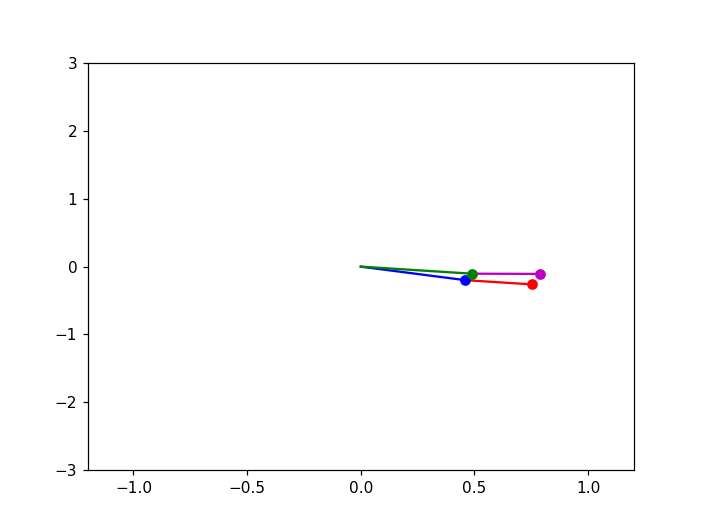

In [26]:
fig = plt.figure()
def PenduloDobleAni(i):
    plt.cla()
    plt.axis([-1.2,1.2,-3,3])
    
    line = plt.plot([0,l1*np.sin(posicionP1_1[i])],[0,-l1*np.cos(posicionP1_1[i])], 'b', 
                    [l1*np.sin(posicionP1_1[i]), l1*np.sin(posicionP1_1[i]) + l2*np.sin(posicionP2_1[i])],[-l1*np.cos(posicionP1_1[i]),-l1*np.cos(posicionP1_1[i]) -l2*np.cos(posicionP2_1[i])], 'r',
                    [0,l1*np.sin(posicionP1_2[i])],[0,-l1*np.cos(posicionP1_2[i])], 'g', 
                    [l1*np.sin(posicionP1_2[i]), l1*np.sin(posicionP1_2[i]) + l2*np.sin(posicionP2_2[i])],[-l1*np.cos(posicionP1_2[i]),-l1*np.cos(posicionP1_2[i]) -l2*np.cos(posicionP2_2[i])], 'm')
    
    bolitas = plt.plot(l1*np.sin(posicionP1_1[i]), -l1*np.cos(posicionP1_1[i]), 'ob', 
                      l1*np.sin(posicionP1_1[i]) + l2*np.sin(posicionP2_1[i]), -l1*np.cos(posicionP1_1[i]) -l2*np.cos(posicionP2_1[i]), 'or',
                      l1*np.sin(posicionP1_2[i]), -l1*np.cos(posicionP1_2[i]), 'og', 
                      l1*np.sin(posicionP1_2[i]) + l2*np.sin(posicionP2_2[i]), -l1*np.cos(posicionP1_2[i]) -l2*np.cos(posicionP2_2[i]), 'om')
    return line,bolita
FuncAnimation(fig, PenduloDobleAni, range(solucion_1.y.shape[1]), repeat = False)